<a href="https://colab.research.google.com/github/Aliasgarsaifee/MNIST-Project-Digits-Recogniser-/blob/master/using%20keras_callback_and_data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.layers import *
from keras.models import Model,Sequential,load_model
from keras.regularizers import *
from keras.activations import *
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt

In [30]:
ls sample_data

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [0]:
train=pd.read_csv('sample_data/mnist_train_small.csv',header=None)
test=pd.read_csv('sample_data/mnist_test.csv',header=None)

In [32]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
labels=train[0]
labels.value_counts()

1    2243
7    2126
6    2039
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 0, dtype: int64

In [0]:
train.drop(columns=0,inplace=True)

In [35]:
train.shape

(20000, 784)

In [0]:
train=train.values
train=train.reshape(train.shape[0],28,28)

In [37]:
train.shape

(20000, 28, 28)

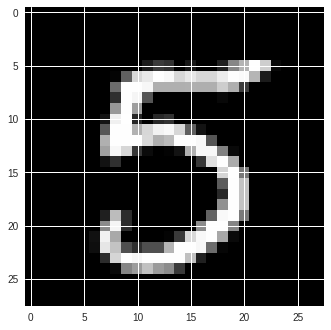

In [38]:
plt.imshow(train[1,:,:],cmap='gray')

In [39]:
test[0]

0       7
1       2
2       1
3       0
4       4
5       1
6       4
7       9
8       5
9       9
10      0
11      6
12      9
13      0
14      1
15      5
16      9
17      7
18      3
19      4
20      9
21      6
22      6
23      5
24      4
25      0
26      7
27      4
28      0
29      1
       ..
9970    5
9971    2
9972    4
9973    9
9974    4
9975    3
9976    6
9977    4
9978    1
9979    7
9980    2
9981    6
9982    5
9983    0
9984    1
9985    2
9986    3
9987    4
9988    5
9989    6
9990    7
9991    8
9992    9
9993    0
9994    1
9995    2
9996    3
9997    4
9998    5
9999    6
Name: 0, Length: 10000, dtype: int64

In [0]:
Y_test=test[0]
test.drop(columns=0,inplace=True)

In [41]:
test.shape

(10000, 784)

In [0]:
test=test.values
test=test.reshape(test.shape[0],28,28)

In [43]:
labels.head()

0    6
1    5
2    7
3    9
4    5
Name: 0, dtype: int64

In [0]:
from keras.utils import to_categorical
labels_one_hot=to_categorical(labels)

In [45]:
test.shape

(10000, 28, 28)

In [0]:
model=Sequential()
#model.add(InputLayer((28,28,1)))
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='relu',padding='valid',input_shape=(28,28,1)))
model.add(BatchNormalization(axis=1,momentum=0.99,epsilon=0.001))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid'))
model.add(BatchNormalization(axis=1,momentum=0.9,epsilon=0.001))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid'))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='valid'))
model.add(BatchNormalization(axis=1,momentum=0.99,epsilon=0.001))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(Flatten())
model.add(Dense(units=128,activation='tanh'))
model.add(Dense(units=256,activation='tanh'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [0]:
#my_data_gen=data_gen(train[...,None],labels_one_hot,32)

In [0]:
from keras.utils import Sequence
import math
class data_gen(Sequence):
  def __init__(self,data,labels,batch_size):
    self.dataset=data
    self.target=labels
    self.batch_length=batch_size
    self.size=len(data)
  def __getitem__(self,i):
        start=i*self.batch_length
        end=min((i+1)*self.batch_length,self.size)
        return self.dataset[start:end],self.target[start:end]
  def __len__(self):
    return math.ceil(self.size/self.batch_length)

In [0]:
data=data_gen(train[...,None],labels_one_hot,32)

In [50]:
data.__getitem__(3)

(array([[[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         ...,
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]]],
 
 
        [[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         

In [0]:
traingen=data_gen(train[:18000,:,:,None],labels_one_hot[:18000,:],200)

In [0]:
valgen=data_gen(train[18001:,:,:,None],labels_one_hot[18001:,:],200)

In [53]:
train[...,None].shape

(20000, 28, 28, 1)

In [54]:
history=model.fit_generator(
   traingen,
    epochs=5,
    validation_data=valgen,
    callbacks=[
                      keras.callbacks.ModelCheckpoint(
                      'model_mnst.h5',
                      monitor='val_loss',
                      verbose=0,
                      save_best_only=True,
                      save_weights_only=True,
                      mode='auto',
                      period=0
                      )
                  ]
)


Epoch 1/5
90/90 [==============================] - 23s 258ms/step - loss: 0.3644 - acc: 0.8962 - val_loss: 0.1245 - val_acc: 0.9575
Epoch 2/5
90/90 [==============================] - 22s 242ms/step - loss: 0.0745 - acc: 0.9773 - val_loss: 0.0909 - val_acc: 0.9680
Epoch 3/5
90/90 [==============================] - 22s 244ms/step - loss: 0.0440 - acc: 0.9868 - val_loss: 0.0764 - val_acc: 0.9775
Epoch 4/5
90/90 [==============================] - 22s 244ms/step - loss: 0.0265 - acc: 0.9925 - val_loss: 0.0700 - val_acc: 0.9750
Epoch 5/5
90/90 [==============================] - 22s 242ms/step - loss: 0.0165 - acc: 0.9959 - val_loss: 0.0701 - val_acc: 0.9815


In [55]:
history.history

{'acc': [0.8962222211062908,
  0.9773333423667484,
  0.9868333452277713,
  0.9925000064902836,
  0.99588889280955],
 'loss': [0.3643742749260532,
  0.07453349332014719,
  0.044004266139947706,
  0.026523595339515142,
  0.016472701291139754],
 'val_acc': [0.9574787408903637,
  0.9679839977507236,
  0.9774887552852927,
  0.9749875093412852,
  0.9814907519921117],
 'val_loss': [0.12449425862931561,
  0.09091280625127685,
  0.07642309154836222,
  0.06995289113601784,
  0.07010639429822929]}

In [56]:
y_pred=model.predict(test[...,None])
Y_pred=np.argmax(y_pred,axis=1)
np.mean((Y_pred==Y_test))

0.9855